In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=11c13dd175b5a6ecf31714ebecbbcd4b75db1653f8b2a4db810ef0cc3932d405
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

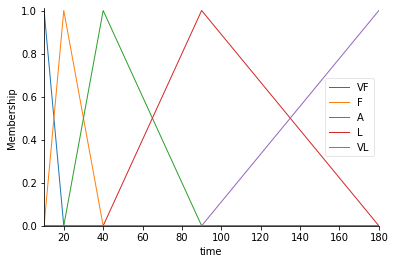

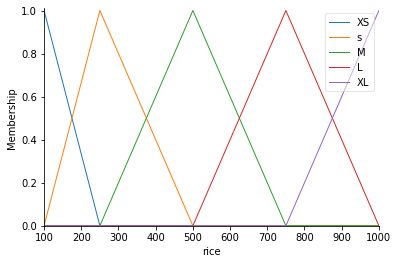

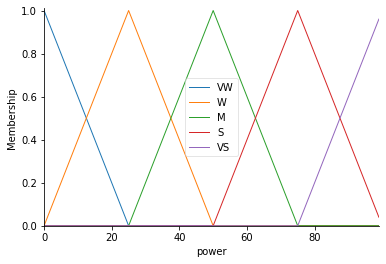

In [ ]:
time = ctrl.Antecedent(np.arange(10,190,10),'time')
rice = ctrl.Antecedent(np.arange(100,1050,50),'rice')
power = ctrl.Consequent(np.arange(0,100,1),'power')
time['VF']= fuzz.trimf(time.universe,[10,10,20])
time['F']= fuzz.trimf(time.universe,[10,20,40])
time['A']= fuzz.trimf(time.universe,[20,40,90])
time['L']= fuzz.trimf(time.universe,[40,90,180])
time['VL']= fuzz.trimf(time.universe,[90,180,180])
rice['XS']= fuzz.trimf(rice.universe,[100,100,250])
rice['s']= fuzz.trimf(rice.universe,[100,250,500])
rice['M']= fuzz.trimf(rice.universe,[250,500,750])
rice['L']= fuzz.trimf(rice.universe,[500,750,1000])
rice['XL']= fuzz.trimf(rice.universe,[750,1000,1000])
power['VW']= fuzz.trimf(power.universe,[0,0,25])
power['W']= fuzz.trimf(power.universe,[0,25,50])
power['M']= fuzz.trimf(power.universe,[25,50,75])
power['S']= fuzz.trimf(power.universe,[50,75,100])
power['VS']= fuzz.trimf(power.universe,[75,100,100])
time.view()
rice.view()
power.view()

In [ ]:
rule_1=ctrl.Rule(time['VF'] & rice['XS'], power['S'])
rule_2=ctrl.Rule(time['VF'] & rice['s'], power['S'])
rule_3=ctrl.Rule(time['VF'] & rice['M'], power['VS'])
rule_4=ctrl.Rule(time['VF'] & rice['L'], power['VS'])
rule_5=ctrl.Rule(time['VF'] & rice['XL'], power['VS'])
rule_6=ctrl.Rule(time['F'] & rice['XS'], power['M'])
rule_7=ctrl.Rule(time['F'] & rice['s'], power['M'])
rule_8=ctrl.Rule(time['F'] & rice['M'], power['S'])
rule_9=ctrl.Rule(time['F'] & rice['L'], power['S'])
rule_10=ctrl.Rule(time['F'] & rice['XL'], power['VS'])
rule_11=ctrl.Rule(time['A'] & rice['XS'], power['W'])
rule_12=ctrl.Rule(time['A'] & rice['s'], power['W'])
rule_13=ctrl.Rule(time['A'] & rice['M'], power['M'])
rule_14=ctrl.Rule(time['A'] & rice['L'], power['M'])
rule_15=ctrl.Rule(time['A'] & rice['XL'], power['S'])
rule_16=ctrl.Rule(time['L'] & rice['XS'], power['VW'])
rule_17=ctrl.Rule(time['L'] & rice['s'], power['VW'])
rule_18=ctrl.Rule(time['L'] & rice['M'], power['W'])
rule_19=ctrl.Rule(time['L'] & rice['L'], power['W'])
rule_20=ctrl.Rule(time['L'] & rice['XL'], power['M'])
rule_21=ctrl.Rule(time['VL'] & rice['XS'], power['VW'])
rule_22=ctrl.Rule(time['VL'] & rice['s'], power['VW'])
rule_23=ctrl.Rule(time['VL'] & rice['M'], power['VW'])
rule_24=ctrl.Rule(time['VL'] & rice['L'], power['VW'])
rule_25=ctrl.Rule(time['VL'] & rice['XL'], power['W'])

Mời bạn nhập
Thời gian nấu (10-180p): 20
Lượng cơm (100-1000g): 1000
Công suất cần để nấu: 91.0 %


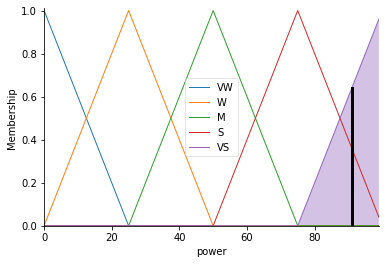

In [ ]:
powering_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
print('Mời bạn nhập')
a = float(input("Thời gian nấu (10-180p): "))
b = float(input("Lượng cơm (100-1000g): "))
powering.input['time'] = a
powering.input['rice'] = b
powering.compute()
c = powering.output['power']
print("Công suất cần để nấu:",c,"%")
power.view(sim=powering)